In [1]:
#Regression Problume

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the Boston house price dataset

In [4]:
dataset = sklearn.datasets.load_boston()

In [5]:
#print(dataset)

In [6]:
# Loading the dataset to a Pandas DataFrame
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [7]:
# Print First 5 rows of our DataFrame
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# add the target (price) column to the DataFrame
data['price'] = dataset.target

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# checking the number of rows and Columns in the data frame
data.shape

(506, 14)

In [11]:
# check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [12]:
# statistical measures of the dataset
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

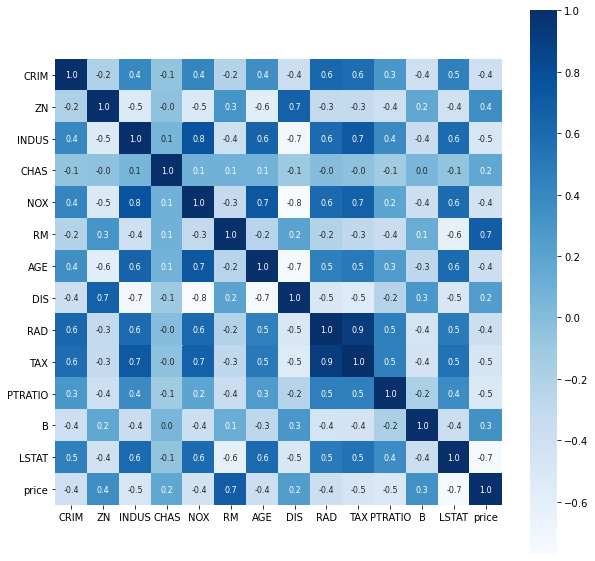

In [13]:
correlation = data.corr()

# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### Splitting the data and Target

In [14]:
x = data.drop(['price'], axis=1)
y = data['price']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [16]:
print(x_train.shape, y_train.shape) 

(404, 13) (404,)


In [17]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [19]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    

In [20]:
x_train= st_x.fit_transform(x_train)    
x_train

array([[-0.37743861, -0.47456976, -0.5837312 , ...,  0.52359086,
         0.45391267, -0.83410575],
       [-0.38918729, -0.47456976, -0.78968387, ...,  0.33155209,
         0.45391267, -0.56340806],
       [-0.39619249,  3.16608882, -1.39883965, ..., -0.14854484,
        -0.13442027,  0.02927739],
       ...,
       [-0.3783975 , -0.47456976, -0.24869553, ...,  0.33155209,
         0.45391267, -0.10179728],
       [-0.3258116 , -0.47456976, -0.47350302, ...,  1.19572656,
         0.44029484, -0.6061498 ],
       [-0.13206441, -0.47456976,  1.18572129, ..., -1.82888409,
        -0.60795914, -0.23144722]])

In [21]:
x_test= st_x.transform(x_test)
x_test

array([[ 0.27566504, -0.47456976,  0.97106639, ...,  0.81164902,
         0.42114476, -0.34684992],
       [-0.26800163, -0.47456976,  1.18572129, ..., -1.82888409,
        -0.11654687, -0.08612531],
       [-0.38933552,  3.16608882, -0.93617133, ...,  0.33155209,
         0.45391267, -1.3056896 ],
       ...,
       [-0.2964127 , -0.47456976,  1.52075696, ...,  1.29174595,
         0.45391267,  0.80005342],
       [-0.39680164,  2.25592418, -1.22914625, ..., -1.39679686,
         0.23900624, -1.18886218],
       [-0.37905876, -0.47456976, -0.5837312 , ...,  0.52359086,
         0.45391267, -0.78708983]])

## Model Traning

# LinearRegression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression().fit(x_train, y_train)

In [24]:
Reg_predict=reg.predict(x_test)

In [25]:
reg.score(x_train, y_train)

0.7285831776605591

In [26]:
reg.score(x_test,y_test)

0.7789207451814417

In [27]:
y_train_pred= reg.predict(x_train)
y_test_pred=reg.predict(x_test)

In [28]:
from sklearn.metrics import r2_score
Train_Res=r2_score(y_train,y_train_pred)
Train_Res

0.7285831776605591

In [29]:
Test_Res=r2_score(y_test,y_test_pred)
Test_Res

0.7789207451814417

## RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor  

In [31]:
rf= RandomForestRegressor(n_estimators= 10)

In [32]:
rf.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=10)

In [33]:
#Predicting the train set result  
x_train_pred= rf.predict(x_train)
#x_train_pred

In [34]:
# R Squared error for training
from sklearn import metrics
error_score = metrics.r2_score(y_train,x_train_pred)
print("R Squared error train :- ",error_score)

R Squared error train :-  0.9749646988355782


In [35]:
#Predicting the test set result  
y_test_pred= rf.predict(x_test) 
#y_test_pred

In [36]:
# R Squared error for testing
from sklearn import metrics
error_score = metrics.r2_score(y_test,y_test_pred)
print("R Squared error test :- ",error_score)

R Squared error test :-  0.872749594600881
